## Q3 e Q4

In [37]:
# Importação seletiva
from pandas import read_excel
from numpy import round

# USUÁRIOS WINDOWS: PRECISAM ALTERAR \ POR / NO DIRETÓRIO

colunas = ['SG_UF', 'NO_ESCOLA', 'VL_OBSERVADO_2021' ]

d2021 = read_excel('C:/Users/209-29/ideb/2021/divulgacao_ensino_medio_escolas_2021.xlsx', skiprows = range(0, 9), usecols= colunas, na_values='-')

In [38]:
colunas = ['SG_UF', 'NO_ESCOLA', 'VL_OBSERVADO_2019' ]
d2019 = read_excel('C:/Users/209-29/ideb/2019/divulgacao_ensino_medio_escolas_2019.xlsx', skiprows = range(0, 9), usecols= colunas, na_values='-')

In [ ]:
d2019.head(5)

In [ ]:
print (d2019.info())

In [ ]:
d2019['VL_OBSERVADO_2019'] = d2019.VL_OBSERVADO_2019.fillna(0).astype(float)

In [ ]:
print (d2019.info())

In [ ]:
d2021['VL_OBSERVADO_2021'] = d2021.VL_OBSERVADO_2021.fillna(0).astype(float)

In [ ]:
print (d2021.info())

## Q5

In [49]:
d2021.NO_ESCOLA.nunique()

19114

In [78]:
tab0 = (d2021.value_counts('VL_OBSERVADO_2021', ascending=False)
    
)
tab0

VL_OBSERVADO_2021
4.3    507
4.5    470
4.4    452
4.1    451
4.2    441
4.6    421
4.0    377
3.9    334
4.7    332
4.8    326
3.8    278
4.9    277
5.0    252
3.7    250
5.1    214
3.6    191
5.2    165
5.3    153
3.5    149
5.4    122
3.4    119
5.6     94
3.3     86
3.2     82
5.5     81
3.1     55
5.7     54
5.8     53
5.9     49
3.0     49
2.9     40
6.0     37
6.1     32
2.8     28
2.7     21
6.2     20
6.4     18
2.6     18
6.3     14
6.5     13
2.4     12
2.5     10
2.3     10
2.2      8
6.7      8
6.6      4
6.8      3
6.9      3
1.9      2
2.0      2
7.0      2
7.4      1
7.5      1
1.4      1
7.2      1
2.1      1
7.6      1
dtype: int64

## Q6

In [59]:
tab1 = (d2021.sort_values('VL_OBSERVADO_2021', ascending=False)
        .head(10)
)
tab1

SG_UF                                          NO_ESCOLA  \
5128     PE                      ESCOLA DE APLICACAO DO RECIFE   
7080     MG               ESCOLA PREPARATORIA DE CADETES DO AR   
17606    RS                            COLEGIO TIRADENTES IJUI   
17778    RS                     COLEGIO TIRADENTES PASSO FUNDO   
3424     CE                       COLEGIO MILITAR DE FORTALEZA   
17994    RS                     COLEGIO TIRADENTES SANTA MARIA   
12699    SP                             PRESIDENTE VARGAS ETEC   
4833     PE  ESCOLA DE APLICACAO PROFESSORA IVONITA ALVES G...   
14296    SP                                 IRMA AGOSTINA ETEC   
6606     BA                        COLEGIO MILITAR DE SALVADOR   

       VL_OBSERVADO_2021  
5128                 7.6  
7080                 7.5  
17606                7.4  
17778                7.2  
3424                 7.0  
17994                7.0  
12699                6.9  
4833                 6.9  
14296                6.9  
6606                 6.8

## Q7

In [67]:
d = d2021.merge(d2019, how = 'outer')
d

SG_UF                                        NO_ESCOLA  \
0        RO                     EEEFM EURIDICE LOPES PEDROSO   
1        RO          EEEMTI JUSCELINO KUBITSCHEK DE OLIVEIRA   
2        RO  COLEGIO TIRADENTES DA POLICIA MILITAR - CTPM XI   
3        RO                              EEEFM CORA CORALINA   
4        RO                              EEEFM CORA CORALINA   
...     ...                                              ...   
25246    DF                       COL OLIMPO DE AGUAS CLARAS   
25247    DF                            CED SIGMA - ASA NORTE   
25248    DF                               COL ALUB ASA NORTE   
25249    DF                                       COL OLIMPO   
25250    DF                            COL COC BRAZLANDIA DF   

       VL_OBSERVADO_2021  VL_OBSERVADO_2019  
0                    3.6                NaN  
1                    5.4                5.5  
2                    NaN                NaN  
3                    2.8                NaN  
4                    2.8                4.3  
...                  ...                ...  
25246                NaN                NaN  
25247                NaN                NaN  
25248                NaN                NaN  
25249                NaN                NaN  
25250                NaN                NaN  

[25251 rows x 4 columns]

In [89]:
df= (
    d.assign(MELHORA = lambda x: (x.VL_OBSERVADO_2019-x.VL_OBSERVADO_2021))
    .reset_index()
    .sort_values('MELHORA', ascending=False)
)
df.dropna().tail(10).sort_values('MELHORA', ascending=True).NO_ESCOLA

13020                                           JOAO XXIII
5642     ESCOLA ESTADUAL MONSENHOR LUIS CARLOS DE OLIVE...
12071                                        CE JOAO KOPKE
12621                                    CE MOACYR PADILHA
9108                                    EE DE ENSINO MEDIO
8252                           EE PROFESSOR CLOVIS SALGADO
9092                                    EE DE ENSINO MEDIO
18160                    LUIZ DE JESUS CORREIA C E C E F M
13287                             EDUARDO VELHO FILHO PROF
9106                                    EE DE ENSINO MEDIO
Name: NO_ESCOLA, dtype: object

In [75]:
tab2 = (df.sort_values('MELHORA', ascending=False)
        .head(10)
)
tab2

index SG_UF                                 NO_ESCOLA  \
7785    7785    MG                               EE SAO JOSE   
7969    7969    MG                    EE PADRE FRANCISCO REY   
9246    9246    MG                        EE DE ENSINO MEDIO   
9728    9728    MG                            EE SAO GERALDO   
9672    9672    MG                          EE SAO SEBASTIAO   
4284    4284    RN  EE PROF MANOEL HERCULANO ENS 1 E 2 GRAUS   
12072  12072    RJ                             CE JOAO KOPKE   
9183    9183    MG                        EE DE ENSINO MEDIO   
9406    9406    MG                          EE SANTO ANTONIO   
7787    7787    MG                               EE SAO JOSE   

       VL_OBSERVADO_2021  VL_OBSERVADO_2019  MELHORA  
7785                 2.8                4.9      2.1  
7969                 2.6                4.7      2.1  
9246                 3.5                5.6      2.1  
9728                 3.0                5.1      2.1  
9672                 3.5                5.5      2.0  
4284                 2.3                4.3      2.0  
12072                3.1                5.1      2.0  
9183                 3.7                5.6      1.9  
9406                 3.6                5.4      1.8  
7787                 2.8                4.6      1.8

## Q8

In [76]:
d2021.VL_OBSERVADO_2021.describe()
# A média entre os valores do IDEB obtidos pelas escolas de ensino médio em 2021 foi de 4.39, sendo razoavelmente baixa já que esse indicador possui valores de 0 a 10
# Poucas escolas se dispersaram em torno da média, obtendo um desvio padrão de 0,7, sendo uma amostra mais uniforme
#o terceiro quartil 75% representa o valor dos 25% melhores da amostra, que possui uma nota de 4.8

count    7195.000000
mean        4.395622
std         0.700196
min         1.400000
25%         4.000000
50%         4.400000
75%         4.800000
max         7.600000
Name: VL_OBSERVADO_2021, dtype: float64

In [94]:
from statistics import median


median(d2021.VL_OBSERVADO_2021.dropna())
# O valor central dos dados possui o valor de 4.4, sendo extremamente parecido com a sua média, chegando perto de uma distribuição normal

4.4

<AxesSubplot:>

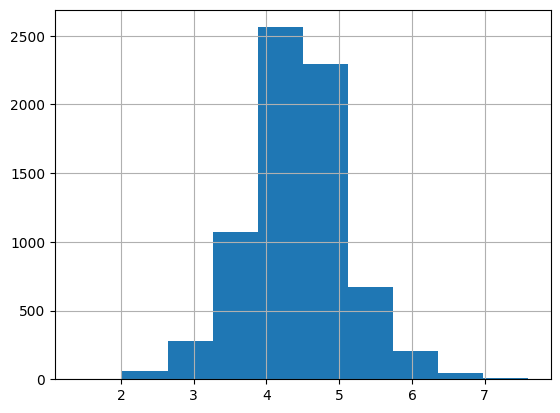

In [92]:
d2021.VL_OBSERVADO_2021.hist()